In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import f_oneway

matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
plasmadata = "/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/metabolomics/Plasma_summary.xlsx"
tissuedata = "/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/metabolomics/Tissue_summary.xlsx"

plasmapoolsize = pd.read_excel(plasmadata, sheet_name=3, header=0)
plasmanormalizedlabeling = pd.read_excel(plasmadata, sheet_name=2, header=0)

tissuepoolsize = pd.read_excel(tissuedata, sheet_name=3, header=0)
tissuenormalizedlabeling = pd.read_excel(tissuedata, sheet_name=2, header=0)

In [3]:
#Convert float to INT to do math on dataframe
tissuepoolsize1 = tissuepoolsize.set_index('Compound')
tissuepoolsize = tissuepoolsize1.astype(int)

plasmapoolsize1 = plasmapoolsize.set_index('Compound')
plasmapoolsize = plasmapoolsize1.astype(int)

Need to normalize pool size so that every metabolite is calculated as a fraction relative to the sum within the tissue

In [4]:
#Pandas automatically does this normalization on a per column basis

tissuepoolsize_nml = tissuepoolsize / tissuepoolsize.sum()
plasmapoolsize_nml = plasmapoolsize / plasmapoolsize.sum()

#Feature Normalization with log transform
tissuepoolsize_nml = np.log2(tissuepoolsize_nml)

#Transpose the dataframe to add info regarding exercise status
tissuepoolsize_nml_t = tissuepoolsize_nml.transpose()

In [6]:
#Add a column that gives each mouse's exercise vs sedentary condition
#May want to add fitness in too
tissuepoolsize_nml_t["Condition"] = 'test'
tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('1|3|5|7|9|11|13|15')] = "Exercise"
tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('2|4|6|8|10|12|14|16')] = "Sedentary"

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_27261/2056248102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('1|3|5|7|9|11|13|15')] = "Exercise"
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_27261/2056248102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('2|4|6|8|10|12|14|16')] = "Sedentary"


In [7]:
#7_heart has a negative infinity value in NADPH

#remove 7_heart

tissuepoolsize_nml_t_clustermap = tissuepoolsize_nml_t.drop(labels='7_heart', axis=0)

In [8]:
condition = tissuepoolsize_nml_t.pop('Condition')

In [9]:
condition1 = tissuepoolsize_nml_t_clustermap.pop('Condition')

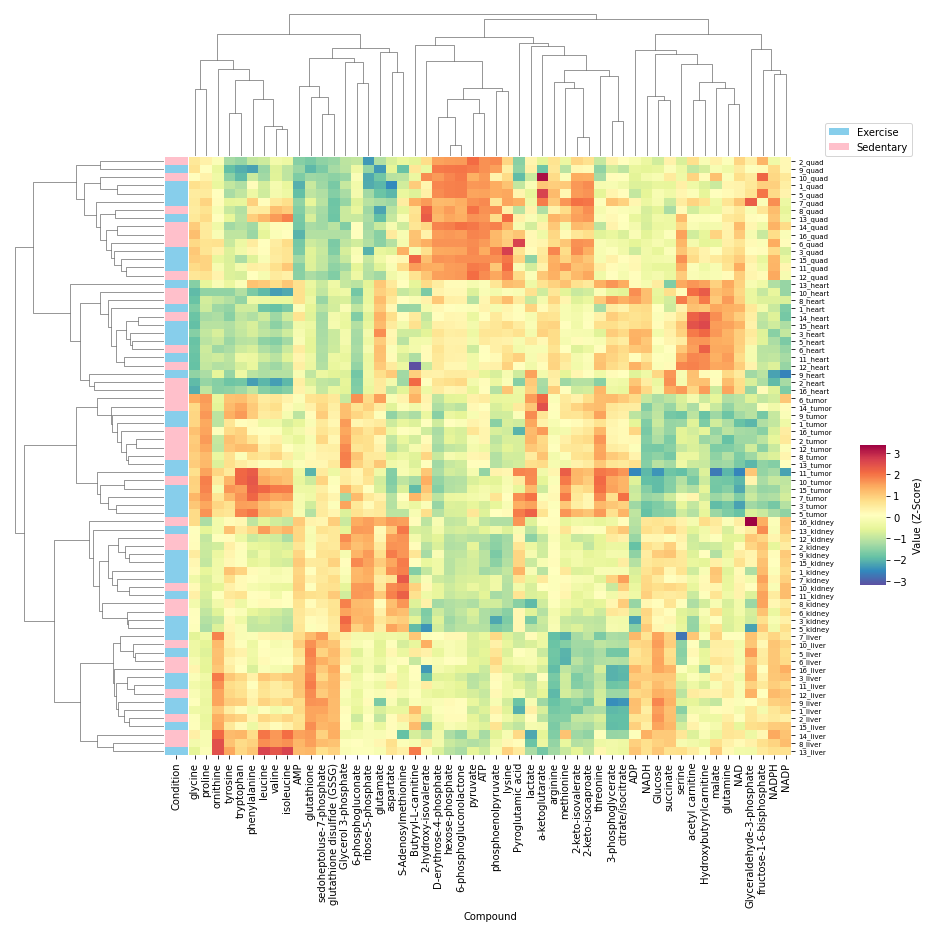

In [9]:
lut = dict(zip(condition1.unique(), ['skyblue', 'pink']), l=0.5, s=0.8)
row_colors = condition1.map(lut)

g = sns.clustermap(tissuepoolsize_nml_t_clustermap, z_score=1, figsize=(12, 13),
                   cbar_pos=(1.0, 0.37, .03, 0.15),
                   cbar_kws={"label" : "Value (Z-Score)"},
                   row_colors=row_colors, 
                   cmap='Spectral_r', #linewidth=0.003,
                   yticklabels=True,
                   xticklabels=True)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 7)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
for label in condition1.unique():
    g.ax_col_dendrogram.bar(0, 0, color=lut[label],
                            label=label, 
                            linewidth=0)
g.ax_col_dendrogram.legend(bbox_to_anchor=(1.2, 0), loc='lower right', borderaxespad=0, ncol=1)
#g.savefig('../figures/tissue_metabolomics_clustermap.svg', bbox_inches="tight", dpi=300)

# Selected Metabolites for Bar Graphs

In [10]:
selectmetabolites = ['glutamate','aspartate','threonine','arginine','valine','leucine','isoleucine','lysine','methionine','phenylalanine','tyrosine','tryptophan','glutamine','serine','glycine', 'proline', 'lactate', '2-keto-isovalerate','2-keto-isocaproate', '2-hydroxy-isovalerate', 'ADP', 'AMP', 'NADPH', 'NADP', 'NAD', 'NADH', 'ATP', 'malate', 'succinate', 'citrate/isocitrate', 'a-ketoglutarate', 'pyruvate', 'lactate', 'phosphoenolpyruvate']

In [11]:
#Transform the data to a more manageable unit: make negative and invert the values, and multiply by 100
normalized_metabolites = (-1/(tissuepoolsize_nml_t))*100

When adding mouse IDs, keep in mind:

mouse 4 is missing for all tissues;

kidney 14 is missing

In [12]:
normalized_metabolites['Condition'] = condition

Heart

In [39]:
heart = normalized_metabolites[normalized_metabolites.index.str.contains('heart')]

heart['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]

heart_long = heart.melt(id_vars=['Condition', 'Mouse'])

heart_selectmetabolites = heart_long[heart_long['Compound'].isin(selectmetabolites)]

heart_selectmetabolites['Tissue'] = 'heart'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_98986/1497745624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_98986/1497745624.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_selectmetabolites['Tissue'] = 'heart'


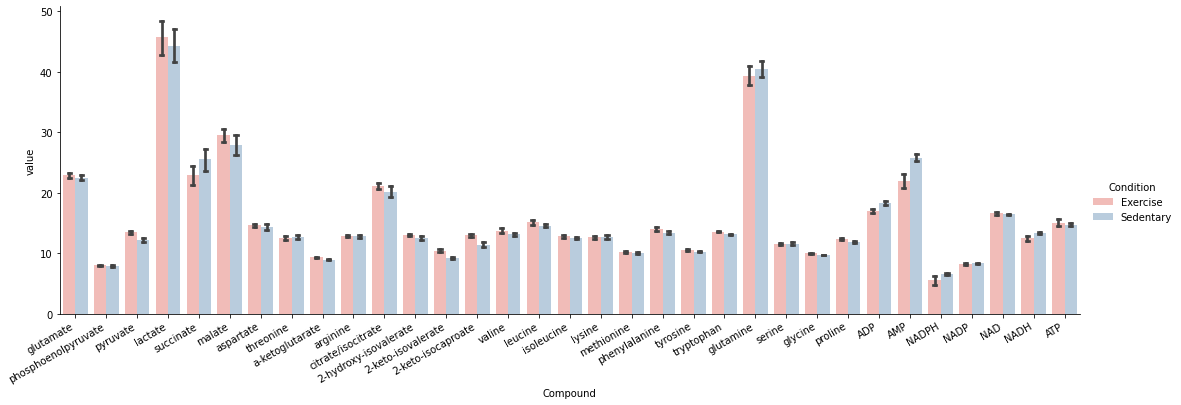

In [40]:
#Heart
g = sns.catplot(data=heart_selectmetabolites, x='Compound', y='value', aspect=3, hue='Condition', palette='Pastel1', ci=68, capsize=0.1, kind='bar')
g.set_xticklabels(rotation=30, ha='right')
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/heartmetabolomics.svg', bbox_inches='tight', dpi=300)

Kidney

In [41]:
kidney = normalized_metabolites[normalized_metabolites.index.str.contains('kidney')]

kidney['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,15,16]

kidney_long = kidney.melt(id_vars=['Condition', 'Mouse'])

kidney_selectmetabolites = kidney_long[kidney_long['Compound'].isin(selectmetabolites)]

kidney_selectmetabolites['Tissue'] = 'kidney'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_98986/1781710839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,15,16]
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_98986/1781710839.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_selectmetabolites['Tissue'] = 'kidney'


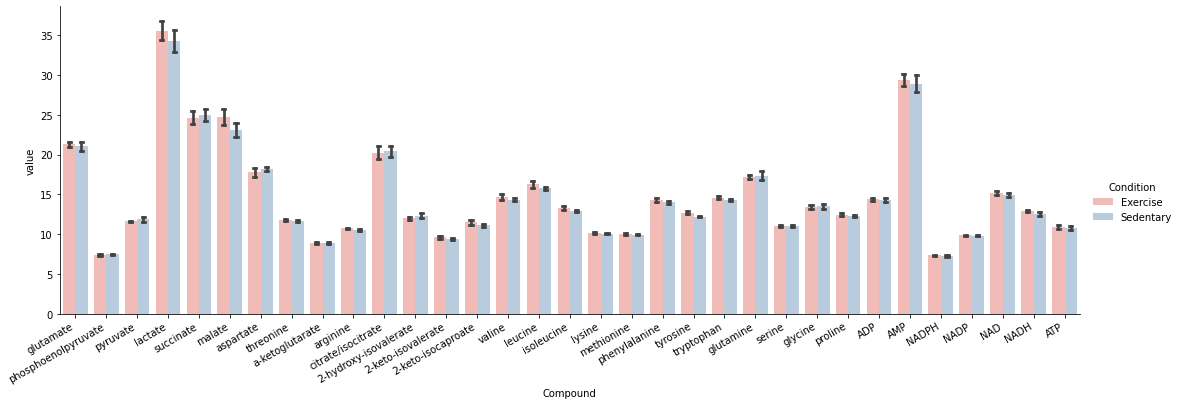

In [42]:
#kidney
g = sns.catplot(data=kidney_selectmetabolites, x='Compound', y='value', aspect=3, hue='Condition', palette='Pastel1', ci=68, capsize=0.1, kind='bar')
g.set_xticklabels(rotation=30, ha='right')
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/kidneymetabolomics.svg', bbox_inches='tight', dpi=300)

liver

In [43]:
liver = normalized_metabolites[normalized_metabolites.index.str.contains('liver')]

liver['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]

liver_long = liver.melt(id_vars=['Condition', 'Mouse'])

liver_selectmetabolites = liver_long[liver_long['Compound'].isin(selectmetabolites)]

liver_selectmetabolites['Tissue'] = 'liver'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_98986/588854908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_98986/588854908.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_selectmetabolites['Tissue'] = 'liver'


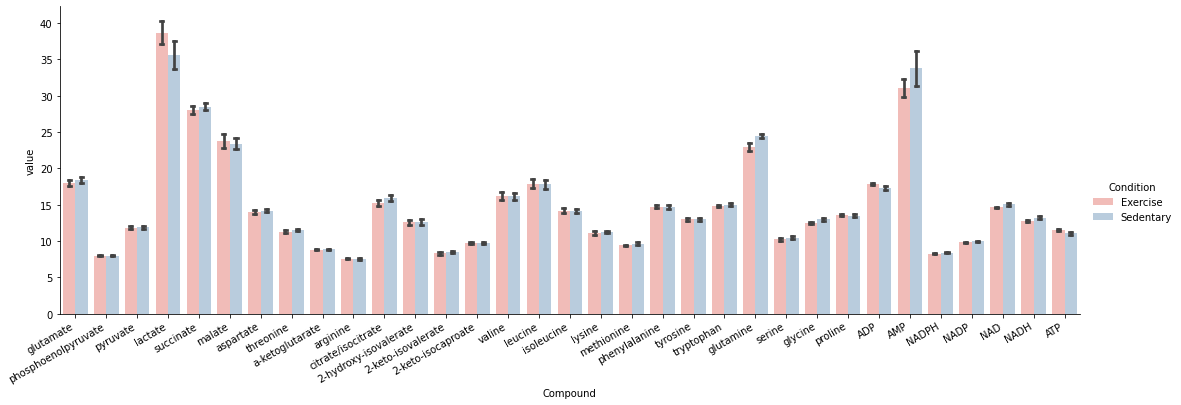

In [44]:
#liver
g = sns.catplot(data=liver_selectmetabolites, x='Compound', y='value', aspect=3, hue='Condition', palette='Pastel1', ci=68, capsize=0.1, kind='bar')
g.set_xticklabels(rotation=30, ha='right')
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/livermetabolomics.svg', bbox_inches='tight', dpi=300)

quad

In [13]:
quad = normalized_metabolites[normalized_metabolites.index.str.contains('quad')]

quad['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]

quad_long = quad.melt(id_vars=['Condition', 'Mouse'])

quad_selectmetabolites = quad_long[quad_long['Compound'].isin(selectmetabolites)]

quad_selectmetabolites['Tissue'] = 'quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_27261/32779538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quad['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_27261/32779538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quad_selectmetabolites['Tissue'] = 'quad'


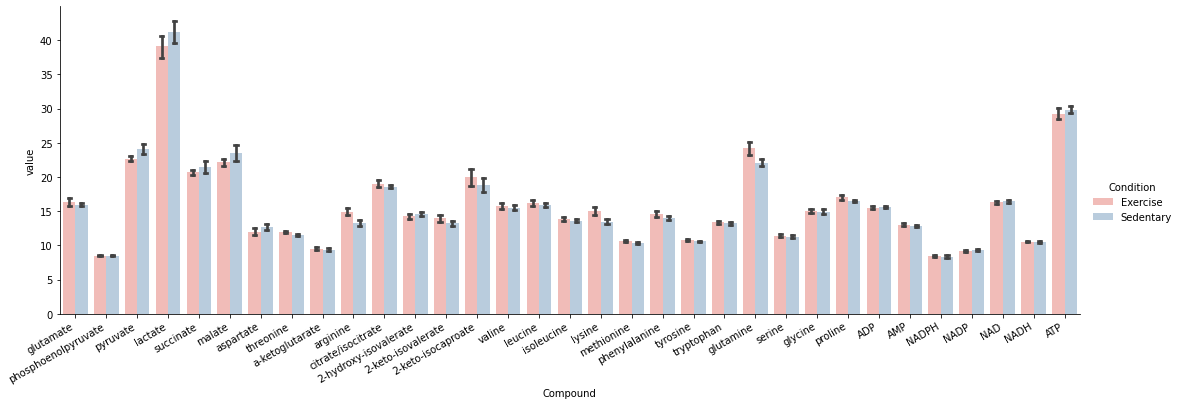

In [18]:
#quad
g = sns.catplot(data=quad_selectmetabolites, x='Compound', y='value', aspect=3, hue='Condition', palette='Pastel1',ci=68, capsize=0.1, kind='bar')
g.set_xticklabels(rotation=30, ha='right')
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/quad_malate.svg', bbox_inches='tight', dpi=300)

tumor

In [19]:
tumor = normalized_metabolites[normalized_metabolites.index.str.contains('tumor')]

tumor['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]

tumor_long = tumor.melt(id_vars=['Condition', 'Mouse'])

tumor_selectmetabolites = tumor_long[tumor_long['Compound'].isin(selectmetabolites)]

tumor_selectmetabolites['Tissue'] = 'tumor'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_27261/3988222042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tumor['Mouse'] = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_27261/3988222042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tumor_selectmetabolites['Tissue'] = 'tumor'


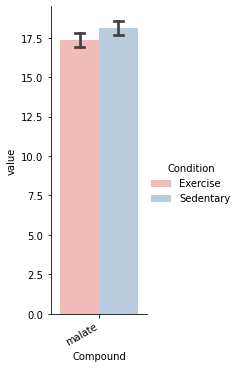

In [21]:
#tumor
g = sns.catplot(data=tumor_selectmetabolites, x='Compound', y='value',aspect=0.5, 
hue='Condition',palette='Pastel1', order=['malate'], ci=68, capsize=0.1, kind='bar')
g.set_xticklabels(rotation=30, ha='right')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/tumor_malate.svg', bbox_inches='tight', dpi=300)

In [30]:
summary_metabolomics = pd.concat([heart_selectmetabolites, kidney_selectmetabolites, liver_selectmetabolites, quad_selectmetabolites, tumor_selectmetabolites])

In [31]:
summary_metabolomics.to_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/metabolomics/select_tissue_metabolites.csv')